In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import os 
import imageio 
from IPython.display import Image
import pandas as pd
import csv

In [2]:
def calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs):
    reference_areas = np.zeros((len(s_values), num_runs))
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        np.random.seed()
        for idx, s in enumerate(s_values):
            reference_s = s
            reference_i_max = i_max
            reference_area = 0.0
            for _ in range(reference_s):
                x = np.random.uniform(xmin, xmax)
                y = np.random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c
                for _ in range(reference_i_max):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    reference_area += 1
            reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)
            reference_areas[idx, run] = reference_area
            print(f"Reference Area for Run {run + 1}: {reference_area}, s: {s}")
    return reference_areas

def calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas):
    area_estimations_sum = np.zeros((i_max, len(s_values), num_runs))
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        np.random.seed()
        for idx, s in enumerate(s_values):
            for j in range(1, i_max + 1):
                AM = 0.0
                for _ in range(s):
                    x = np.random.uniform(xmin, xmax)
                    y = np.random.uniform(ymin, ymax)
                    c = complex(x, y)
                    z = c
                    for _ in range(j):
                        if abs(z) > 2.0:
                            break
                        z = z * z + c
                    else:
                        AM += 1
                AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
                area_estimations_sum[j - 1, idx, run] = AM
    return area_estimations_sum

# Define the parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 200
s_values = [10, 500, 1000, 1500, 2000, 2500]
num_runs = 10

# Calculate reference areas
reference_areas = calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs)

# Calculate area estimations
area_estimations_sum = calculate_area_estimations(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, reference_areas)

# Calculate the reference area averages for each 's' value
reference_areas_avg = np.mean(reference_areas, axis=1)
print(reference_areas_avg)

Run 1/10
Reference Area for Run 1: 2.6999999999999997, s: 10
Reference Area for Run 1: 1.422, s: 500
Reference Area for Run 1: 1.5569999999999997, s: 1000
Reference Area for Run 1: 1.59, s: 1500
Reference Area for Run 1: 1.5165000000000002, s: 2000
Reference Area for Run 1: 1.5587999999999997, s: 2500
Run 2/10
Reference Area for Run 2: 1.8000000000000003, s: 10
Reference Area for Run 2: 1.6920000000000002, s: 500
Reference Area for Run 2: 1.476, s: 1000
Reference Area for Run 2: 1.4100000000000001, s: 1500
Reference Area for Run 2: 1.458, s: 2000
Reference Area for Run 2: 1.4544000000000001, s: 2500
Run 3/10
Reference Area for Run 3: 1.8000000000000003, s: 10
Reference Area for Run 3: 1.62, s: 500
Reference Area for Run 3: 1.6380000000000001, s: 1000
Reference Area for Run 3: 1.5, s: 1500
Reference Area for Run 3: 1.5075000000000003, s: 2000
Reference Area for Run 3: 1.5732, s: 2500
Run 4/10
Reference Area for Run 4: 3.6000000000000005, s: 10
Reference Area for Run 4: 1.602, s: 500
Ref

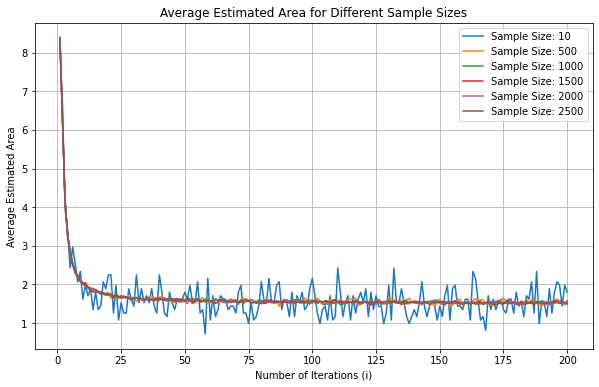

In [7]:
plt.figure(figsize=(10, 6))

# Calculate the average estimated area for each sample size
average_area_by_sample = np.mean(area_estimations_sum, axis=2)

# Plotting the estimated area for different sample sizes
for idx, s in enumerate(s_values):
    plt.plot(range(1, i_max + 1), average_area_by_sample[:, idx], label=f'Sample Size: {s}')

plt.xlabel('Number of Iterations (i)')
plt.ylabel('Average Estimated Area')
plt.title('Average Estimated Area for Different Sample Sizes')
plt.legend()
plt.grid()
plt.show()

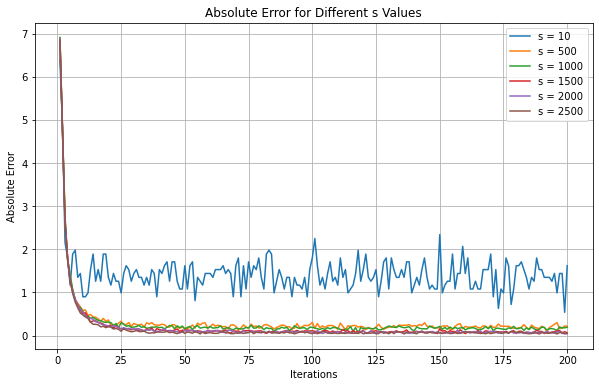

In [13]:
plt.figure(figsize=(10, 6))

# Reshape the reference_areas array
reshaped_reference_areas = reference_areas.reshape(1, len(s_values), num_runs)

# Calculate the absolute error based on s_values
absolute_errors = np.abs(area_estimations_sum - reshaped_reference_areas)

# Plot the absolute errors for different s_values
for i, s in enumerate(s_values):
    plt.plot(range(1, i_max + 1), absolute_errors[:, i, :].mean(axis=1), label=f's = {s}')

plt.xlabel('Iterations')
plt.ylabel('Absolute Error')
plt.title('Absolute Error for Different s Values')
plt.legend()
plt.grid()
plt.show()

# Implement for LHS